In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import json
import os

from sklearn.tree import DecisionTreeClassifier

from data_cleaning import DataCleaner, AutomaticCleaner, HypothesesFinder, DataExtractor

In [2]:
cleaner = DataCleaner()

In [3]:
for filename in os.listdir('cleaned_sem_databases'):
    if filename != 'Readme.txt':
        f = os.path.join('cleaned_sem_databases', filename)
        if df.empty:
            df = pd.read_csv(f)
        else:
            temp = pd.read_csv(f)
            df = cleaner.binary_merge(df,temp)

NameError: name 'df' is not defined

In [6]:
#cleaner.fix_column_values(df)

In [15]:
#df = df[(((df['veridicality'].notna()) & (df['veridicality'] != '-')) | ((df['gradability wrt int'].notna()) & (df['gradability wrt int'] != '-')))]

In [5]:
#df = df.reset_index().drop('index', axis=1)
#df

In [19]:
#df.to_csv('sem_merged_database.csv', index=False)

In [4]:
df = pd.read_csv('sem_merged_database.csv')

In [7]:
sem=df
sem['label'] = sem['ignorance/belief wrt int'].fillna('anti-rogative')
with open('values_of_columns.json', 'r') as f:
  data = json.load(f)

for value in data['ignorance/belief wrt int']:
    sem['label'] = sem['label'].replace(value, 'responsive')
#Check if the values are correct
#Drop other columns which are not defined for both anti-rogatives and responsive
sem = sem.drop(['ignorance/belief wrt int','gradability wrt int', 'Q-to-P veridicality', 'Q-to-P distributivity', 'P-to-Q distributivity'], axis =1) 
#Drop rogative predicates
sem = sem.dropna()
print(sem['label'].value_counts())
sem = sem.reset_index()
sem = sem.drop('index', axis=1)

responsive       680
anti-rogative    350
Name: label, dtype: int64


In [8]:
extractor = DataExtractor()

In [9]:
sem.columns

Index(['language', 'predicate', 'English translation', 'predicate class',
       'veridicality', 'conjoined with negation', 'conjoined with complement',
       'projection through negation', 'neg-raising', 'likelihood',
       'unlikelihood', 'equal likelihood', 'certainty', 'counter-certainty',
       'uncertainty', 'preference', 'opposition', 'indifference',
       'focus sensitivity', 'gradability wrt decl', 'label'],
      dtype='object')

In [13]:
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'])

In [14]:
X.columns

Index(['focus sensitivity', 'veridicality_anti-veridical',
       'veridicality_neither', 'veridicality_typically anti-veridical',
       'veridicality_typically veridical', 'veridicality_veridical',
       'conjoined with negation_contradictory',
       'conjoined with negation_neither', 'conjoined with negation_redundant',
       'conjoined with complement_contradictory',
       'conjoined with complement_neither',
       'conjoined with complement_redundant',
       'conjoined with complement_typically redundant',
       'projection through negation_neither',
       'projection through negation_projective',
       'projection through negation_reversal',
       'projection through negation_typically projective',
       'projection through negation_typically reversal',
       'projection through negation_undecided', 'neg-raising_0',
       'neg-raising_1', 'neg-raising_typically neg-raising',
       'neg-raising_undecided', 'likelihood_always', 'likelihood_compatible',
       'likelih

In [15]:
y=sem.label

In [16]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

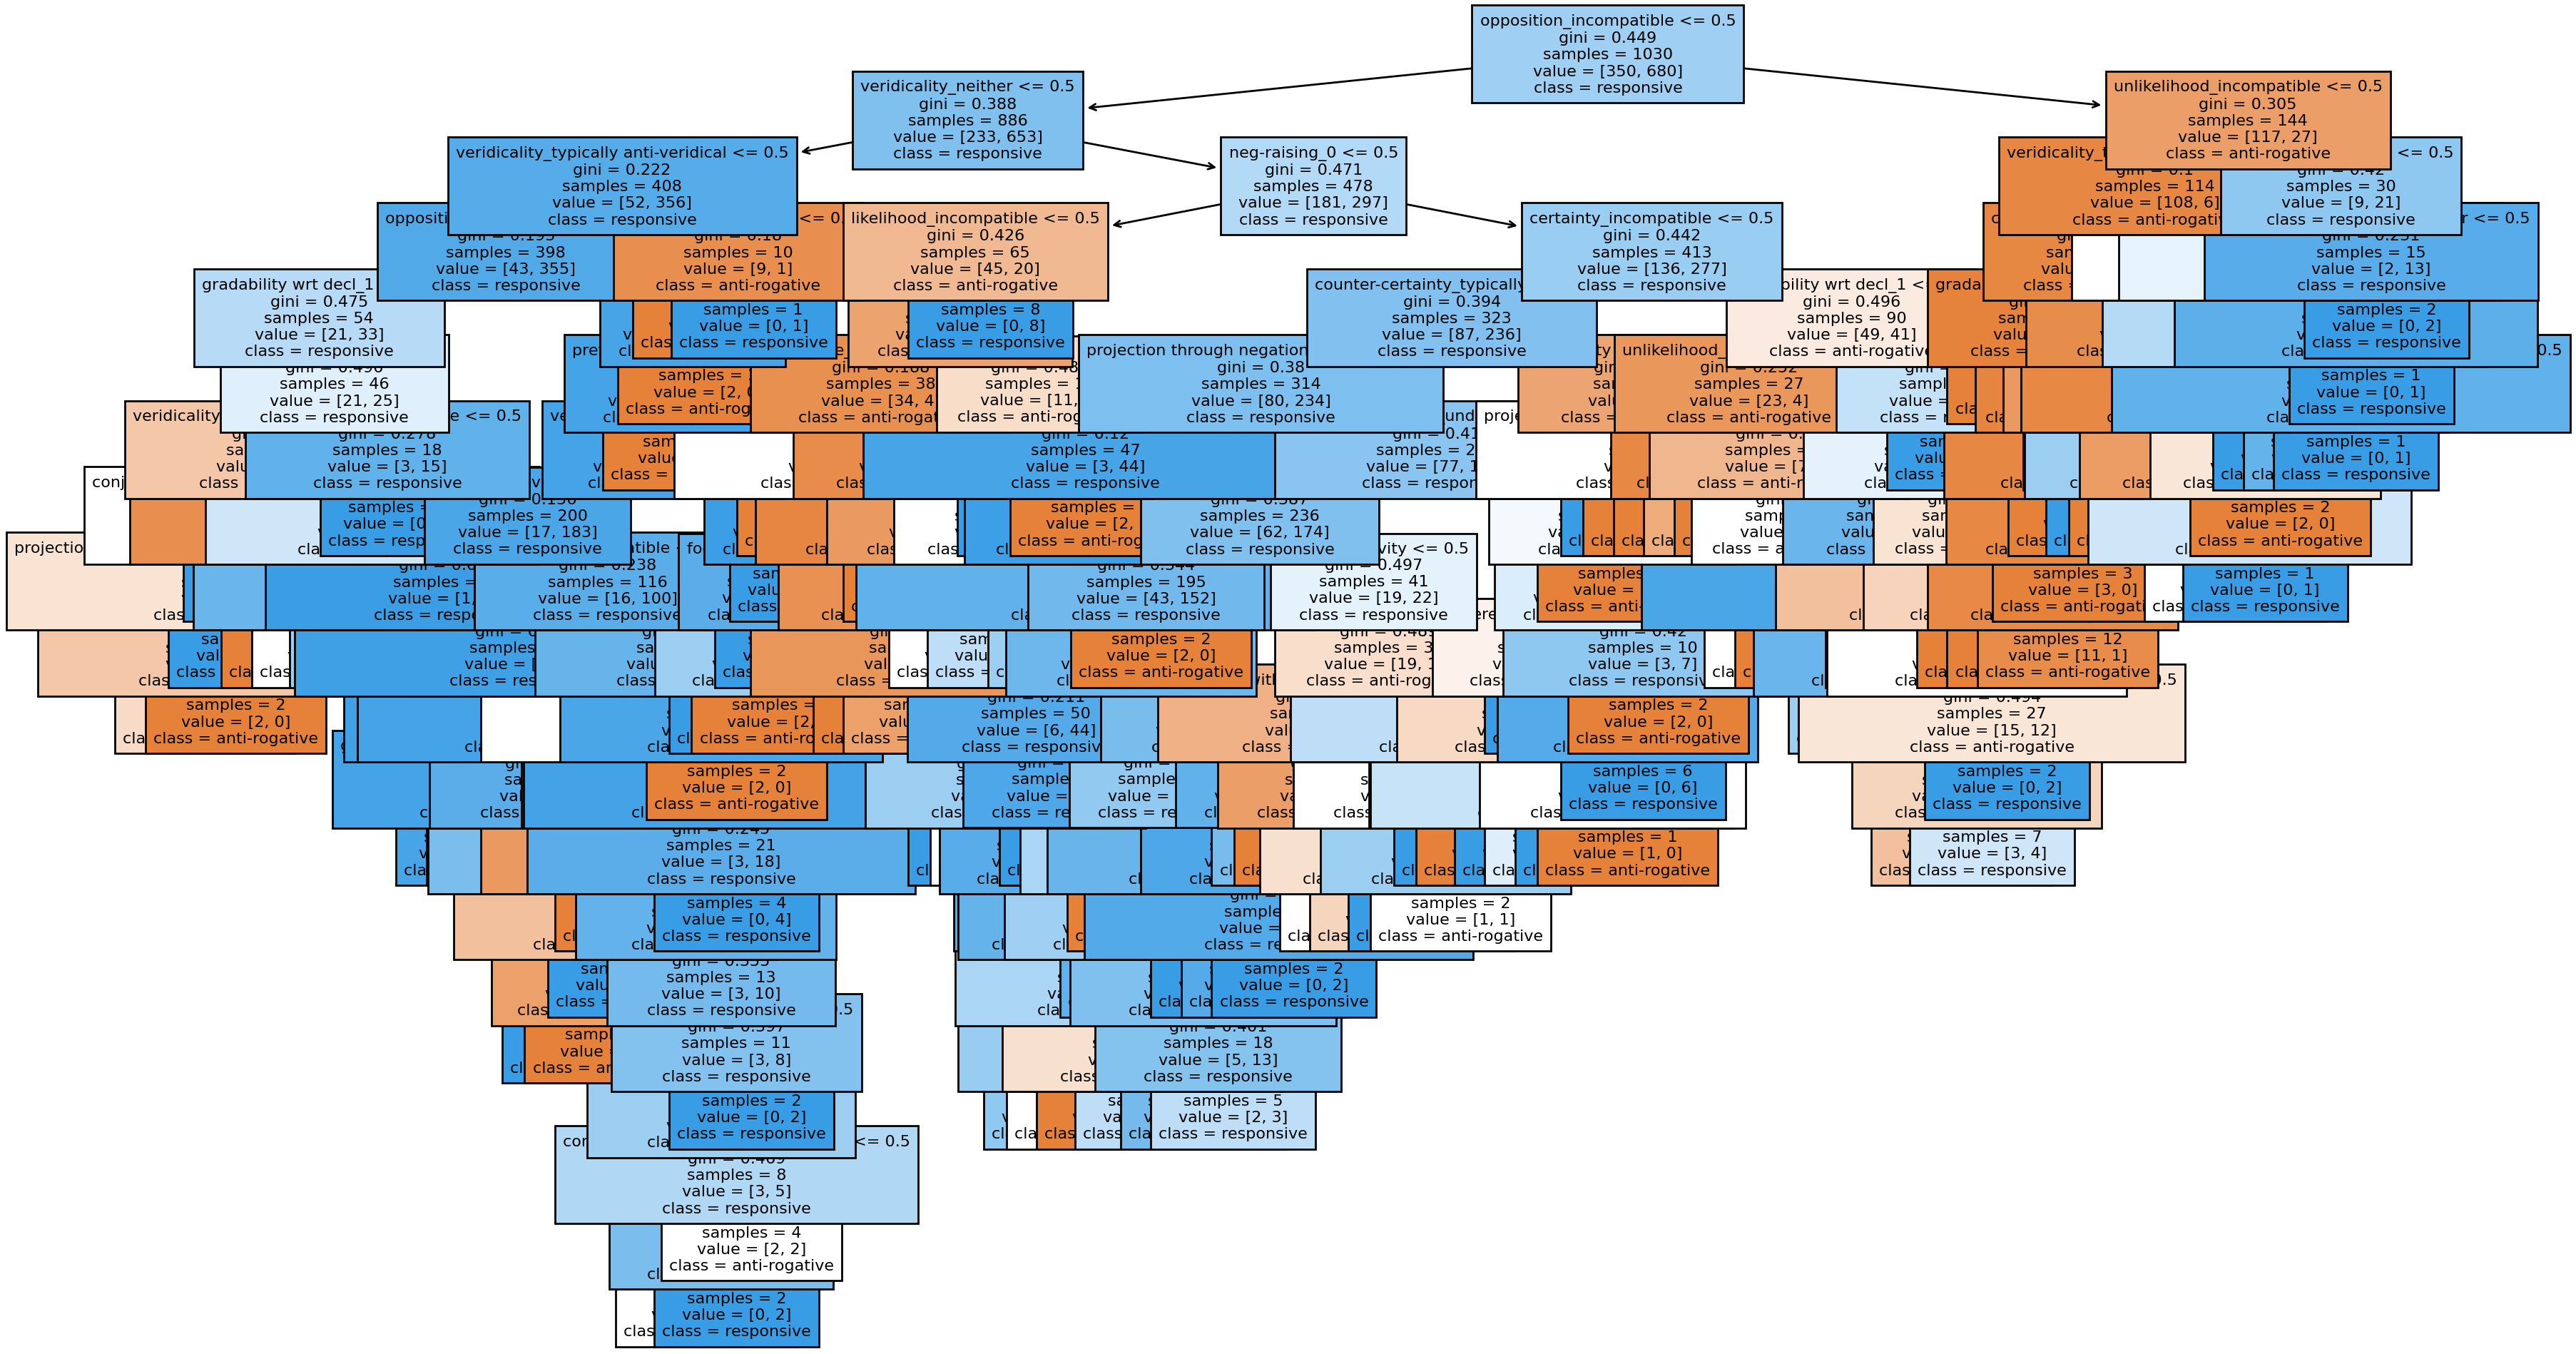

In [17]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,12), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

In [18]:
finder = HypothesesFinder()
branches = finder.retreive_text_branches(model, X)

In [19]:
branches

[[('opposition_incompatible', '0'),
  ('veridicality_neither', '0'),
  ('veridicality_typically anti-veridical', '0'),
  ('opposition_compatible', '1'),
  ('neg-raising_1', '0'),
  ('preference_always', '0'),
  ('veridicality_veridical', '1'),
  ('neg-raising_0', '1'),
  ('responsive', 127)],
 [('opposition_incompatible', '0'),
  ('veridicality_neither', '0'),
  ('veridicality_typically anti-veridical', '0'),
  ('opposition_compatible', '1'),
  ('neg-raising_1', '0'),
  ('preference_always', '0'),
  ('veridicality_veridical', '0'),
  ('focus sensitivity', '0'),
  ('projection through negation_neither', '0'),
  ('responsive', 42)],
 [('opposition_incompatible', '0'),
  ('veridicality_neither', '1'),
  ('neg-raising_0', '1'),
  ('certainty_incompatible', '0'),
  ('counter-certainty_typically', '0'),
  ('projection through negation_neither', '0'),
  ('projection through negation_typically reversal', '0'),
  ('certainty_always', '0'),
  ('responsive', 39)],
 [('opposition_incompatible', '0

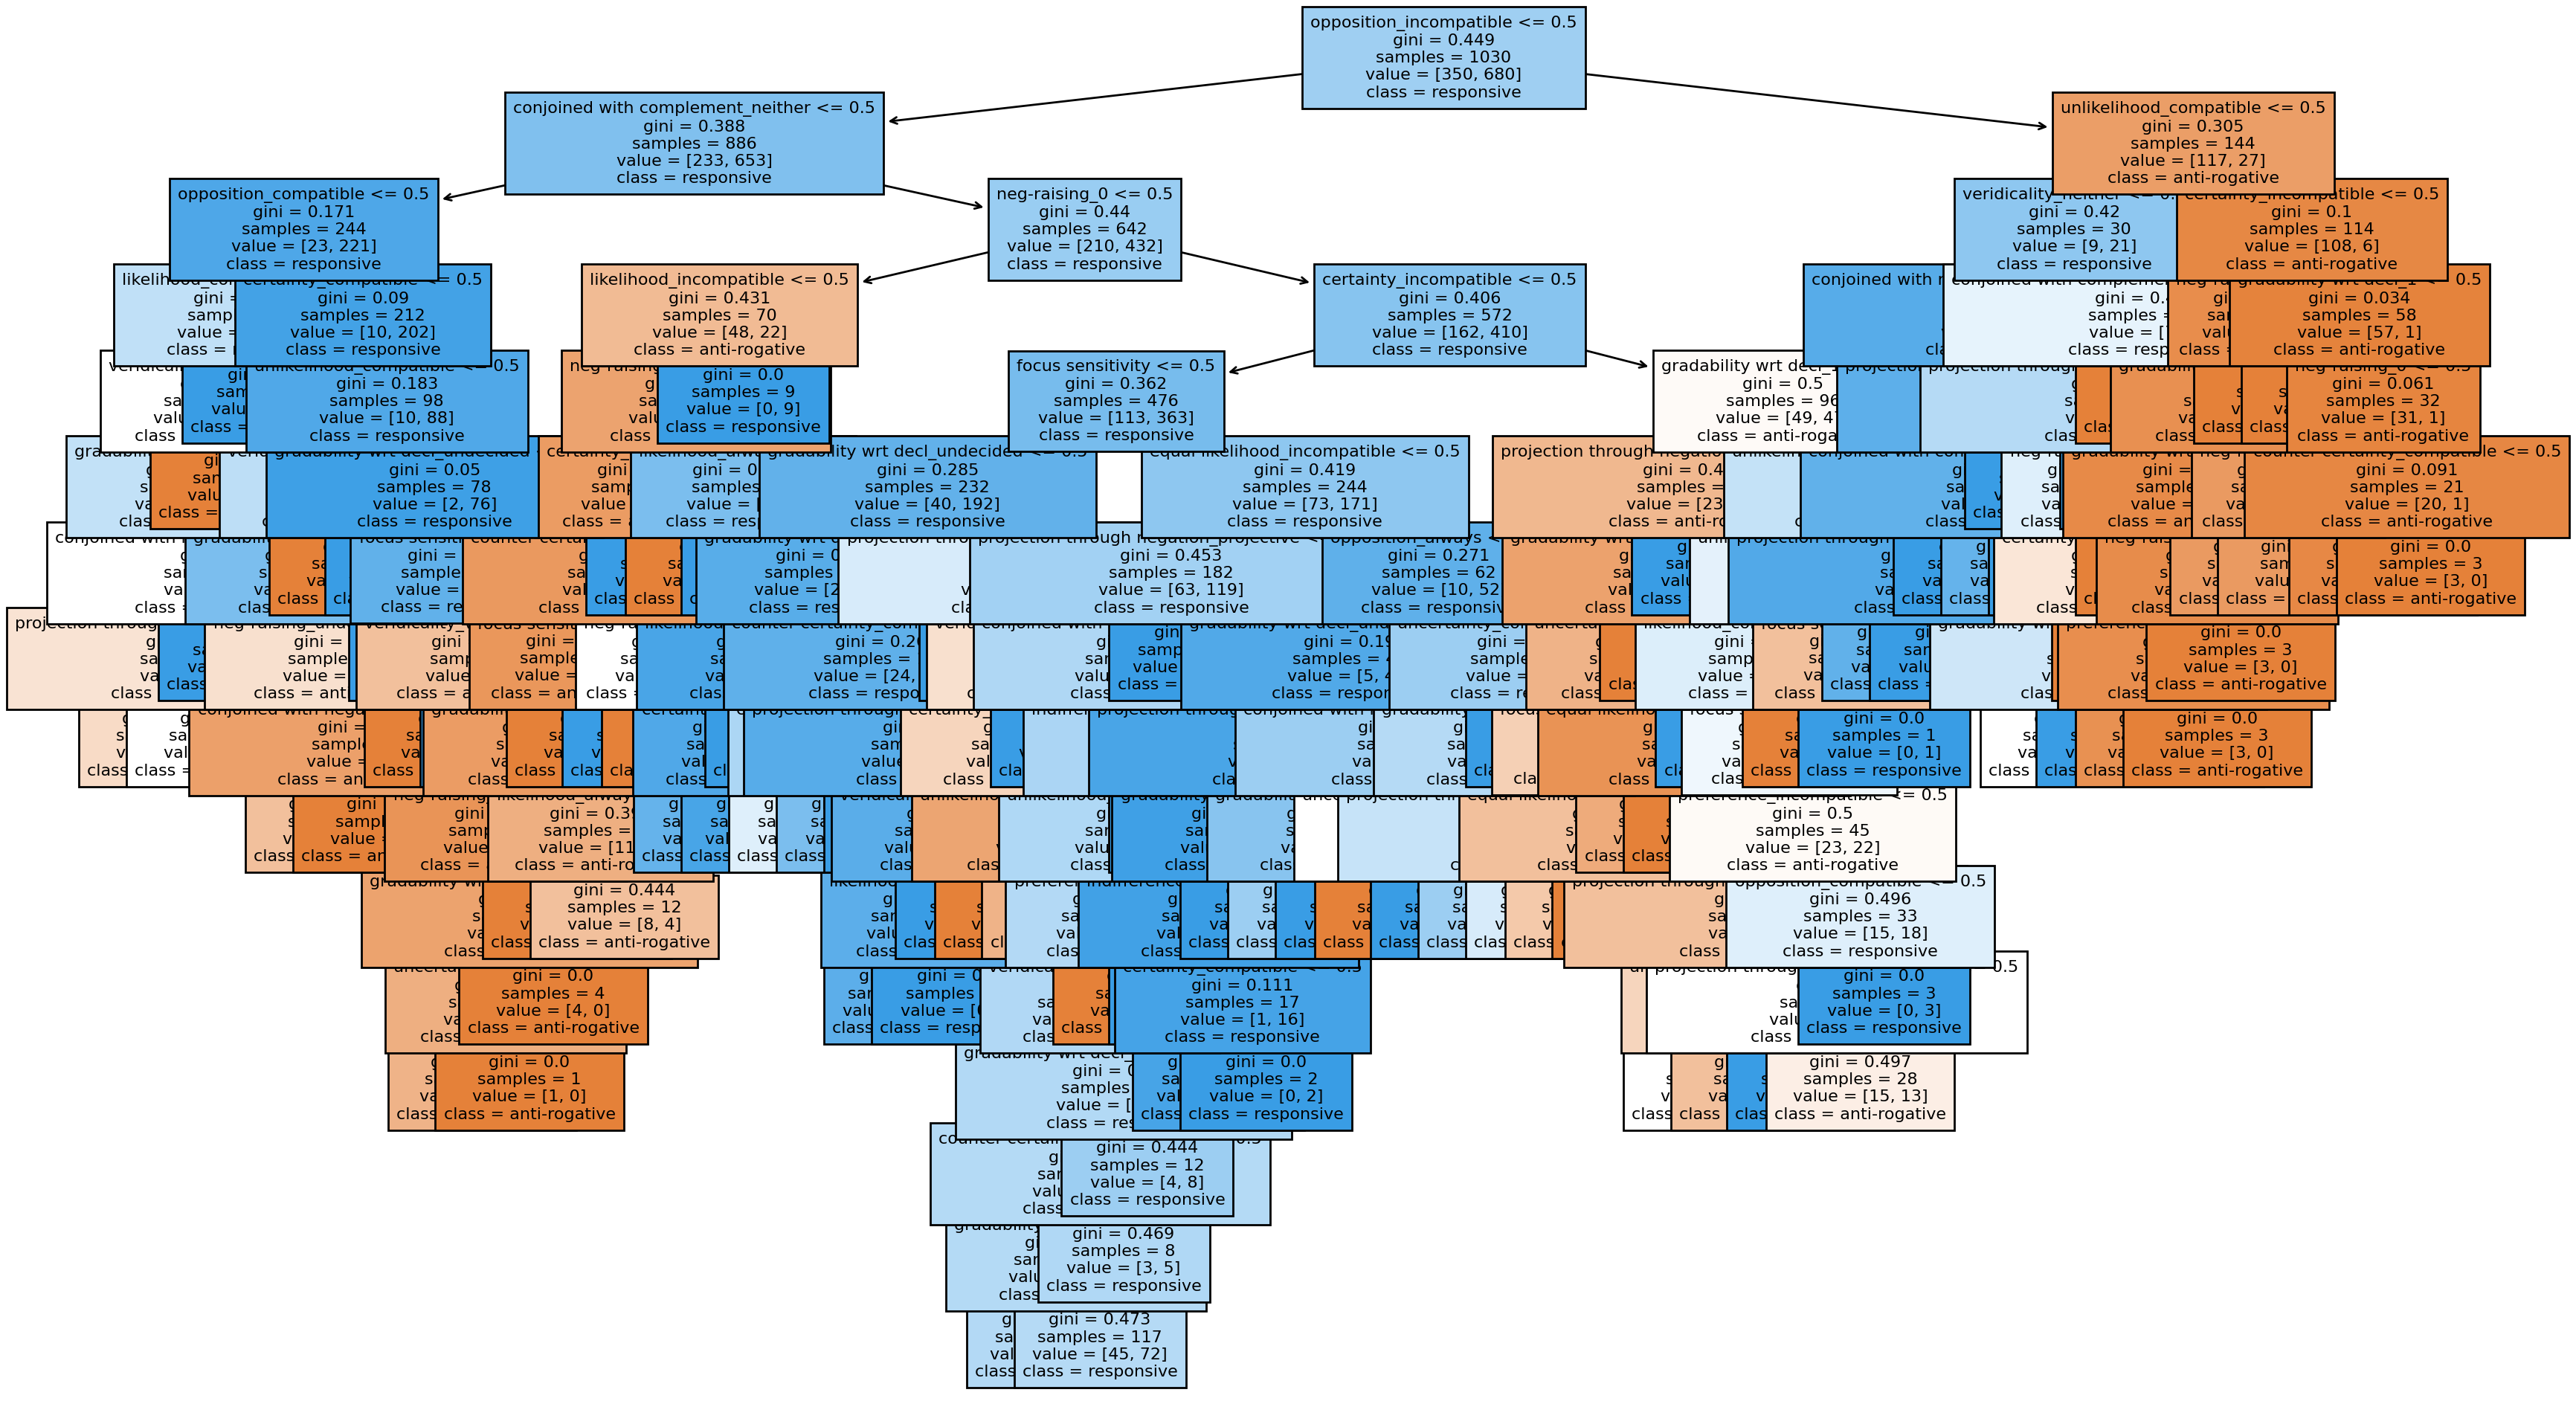

In [20]:
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'], remove_typically=True)
y=sem.label

model = DecisionTreeClassifier()
model.fit(X,y)

plt.figure(figsize=(20,12), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

In [22]:
branches = finder.retreive_text_branches(model, X)
branches


[[('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '0'),
  ('opposition_compatible', '1'),
  ('certainty_compatible', '0'),
  ('responsive', 114)],
 [('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '0'),
  ('opposition_compatible', '1'),
  ('certainty_compatible', '1'),
  ('unlikelihood_compatible', '1'),
  ('gradability wrt decl_undecided', '0'),
  ('responsive', 66)],
 [('opposition_incompatible', '1'),
  ('unlikelihood_compatible', '1'),
  ('certainty_incompatible', '1'),
  ('gradability wrt decl_1', '0'),
  ('anti-rogative', 26)],
 [('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '1'),
  ('neg-raising_0', '1'),
  ('certainty_incompatible', '0'),
  ('focus sensitivity', '0'),
  ('gradability wrt decl_undecided', '0'),
  ('gradability wrt decl_0', '0'),
  ('likelihood_compatible', '1'),
  ('responsive', 16)],
 [('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '1'),
  ('neg-raising_0'

In [23]:
branches = finder.retreive_text_branches(model, X,  exception_size=4)
branches

[[('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '0'),
  ('opposition_compatible', '1'),
  ('certainty_compatible', '0'),
  ('responsive', 114, 'exceptions: 0')],
 [('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '0'),
  ('opposition_compatible', '1'),
  ('certainty_compatible', '1'),
  ('unlikelihood_compatible', '1'),
  ('responsive', 76, 'exceptions: 2'),
  ('gradability wrt decl_undecided', '0'),
  ('responsive', 66, 'exceptions: 0')],
 [('opposition_incompatible', '0'),
  ('conjoined with complement_neither', '1'),
  ('neg-raising_0', '1'),
  ('certainty_incompatible', '0'),
  ('focus sensitivity', '0'),
  ('gradability wrt decl_undecided', '0'),
  ('gradability wrt decl_0', '0'),
  ('responsive', 51, 'exceptions: 4'),
  ('likelihood_compatible', '0'),
  ('responsive', 35, 'exceptions: 4'),
  ('certainty_always', '1'),
  ('responsive', 26, 'exceptions: 2')],
 [('opposition_incompatible', '1'),
  ('unlikelihood_compatible', '1'),

In [24]:
hypotheses = finder.forest_based_discovery(X,y, limit=3, exception_size=4)

In [25]:
hypotheses

[[('preference_compatible', '1'),
  ('conjoined with complement_redundant', '1'),
  ('gradability wrt decl_undecided', '0'),
  ('responsive', 158, 'exceptions: 4')],
 [('opposition_compatible', '1'),
  ('conjoined with complement_redundant', '1'),
  ('gradability wrt decl_undecided', '0'),
  ('responsive', 158, 'exceptions: 4')],
 [('veridicality_neither', '0'),
  ('preference_incompatible', '0'),
  ('projection through negation_reversal', '0'),
  ('responsive', 157, 'exceptions: 4')],
 [('veridicality_neither', '0'),
  ('opposition_always', '0'),
  ('projection through negation_reversal', '0'),
  ('responsive', 157, 'exceptions: 4')],
 [('preference_compatible', '1'),
  ('veridicality_neither', '0'),
  ('responsive', 157, 'exceptions: 4')],
 [('opposition_compatible', '1'),
  ('veridicality_neither', '0'),
  ('responsive', 157, 'exceptions: 4')],
 [('preference_always', '0'),
  ('veridicality_neither', '0'),
  ('preference_compatible', '1'),
  ('responsive', 157, 'exceptions: 4')],
 [